In [10]:
DATABASE_HOST="172.19.0.8"
DATABASE_DATABASE="fabricexplorer"
DATABASE_USERNAME="hppoc"
DATABASE_PASSWORD="password"
import pandas as pd
from sqlalchemy import create_engine
import bamboolib as bam
import hiplot as hip
import matplotlib.pyplot as ptlib
import json

# to get the ips of docker containers
# docker ps -q | xargs -n 1 docker inspect --format '{{ .Name }} {{range .NetworkSettings.Networks}} {{.IPAddress}}{{end}}' | sed 's#^/##';
# list all user defined tables and schemas
# "SELECT * FROM pg_catalog.pg_tables WHERE schemaname != 'information_schema' AND schemaname != 'pg_catalog';"

#initializing resources
engine = create_engine('postgresql://'+DATABASE_USERNAME+':'+DATABASE_PASSWORD+'@'+DATABASE_HOST+':5432/'+DATABASE_DATABASE)

txQuery = "SELECT * FROM transactions"
import plotly.express as px
txDf = pd.read_sql(txQuery,con=engine)
fig = px.bar(txDf, x='type',title='Types of Transactions')
fig.show()

In [61]:
blockQuery = "SELECT * FROM transactions"
blockDf = pd.read_sql_query(blockQuery,con=engine)
blockDf = blockDf[blockDf['chaincodename']=='basic']
readsets = blockDf['read_set'].to_list()
readsets = pd.DataFrame(readsets)
readsets.columns = [str(column) for column in readsets.columns]
readsets = readsets.drop(columns=['0'])
readsets = readsets.astype("string")
readsets
# asd = pd.DataFrame(readsets['0'].to_list())
# idk = asd['set'][0][0]
# idk =json.dumps(idk)
# idk = pd.read_json(idk)
# idk
# rs1 = pd.DataFrame(readsets[])
# readKeys = {'keys':[]}
# for i in range(0,len(readsets)):
#     if len(readsets[i][1]['set'])>0:
#         readKeys['keys'].append(readsets[i][1]['set'][0]['key'])
# readKeys = pd.DataFrame(readKeys)
# x = readKeys['keys'].unique()
# ptlib.bar(x, readKeys['keys'].value_counts())
# print('The number of times each key was read')
# ptlib.show()

                                                    1
0   {'chaincode': 'basic', 'set': [{'key': 'asset6...
1                   {'chaincode': 'basic', 'set': []}
2   {'chaincode': 'basic', 'set': [{'key': 'asset1...
3   {'chaincode': 'basic', 'set': [{'key': 'asset1...
4   {'chaincode': 'basic', 'set': [{'key': 'asset1...
5   {'chaincode': 'basic', 'set': [{'key': 'asset1...
6   {'chaincode': 'basic', 'set': [{'key': 'asset1...
7   {'chaincode': 'basic', 'set': [{'key': 'asset1...
8   {'chaincode': 'basic', 'set': [{'key': 'asset1...
9   {'chaincode': 'basic', 'set': [{'key': 'asset1...
10  {'chaincode': 'basic', 'set': [{'key': 'asset1...
11  {'chaincode': 'basic', 'set': [{'key': 'asset1...
12  {'chaincode': 'basic', 'set': [{'key': 'asset1...
13  {'chaincode': 'basic', 'set': [{'key': 'asset1...
14  {'chaincode': 'basic', 'set': [{'key': 'asset2...
15  {'chaincode': 'basic', 'set': [{'key': 'asset3...
16  {'chaincode': 'basic', 'set': [{'key': 'asset4...
17  {'chaincode': 'basic', '

Number of times each key was read:


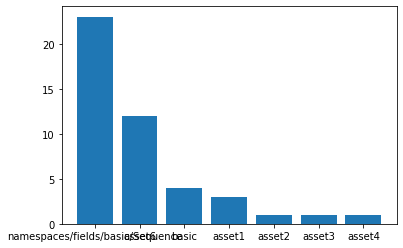

In [5]:
set = txDf['read_set'].to_frame()
set = set[~set['read_set'].isnull()]
set['read_set'].to_list()
valid_sets = []
for i in range(0,len(set)):
    set.values[i].flatten()
    if(type(set.values[i][0]) is list):
        valid_sets.append(set.values[i][0])
keys = []
for i in range(0, len(valid_sets)):
    for j in range (0, len(valid_sets[i])):
        setDict = valid_sets[i][j]
        setDict = setDict['set']
        if len(setDict) >0:
            setDict = setDict[0]
            keys.append(setDict['key'])
keys = {'keys':keys}
keys = pd.DataFrame(keys)
x= keys["keys"].unique()
ptlib.bar(x,keys.value_counts())
print('Number of times each key was read:')
ptlib.show()